<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#sklearn中的降维算法概览" data-toc-modified-id="sklearn中的降维算法概览-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>sklearn中的降维算法概览</a></span></li><li><span><a href="#重要参数n_components" data-toc-modified-id="重要参数n_components-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>重要参数n_components</a></span><ul class="toc-item"><li><span><a href="#调用库和模块" data-toc-modified-id="调用库和模块-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>调用库和模块</a></span></li><li><span><a href="#提取数据集" data-toc-modified-id="提取数据集-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>提取数据集</a></span></li><li><span><a href="#提取特征和标签" data-toc-modified-id="提取特征和标签-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>提取特征和标签</a></span></li><li><span><a href="#现在利用PCA把4列特征，降成2列，以进行可视化" data-toc-modified-id="现在利用PCA把4列特征，降成2列，以进行可视化-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>现在利用PCA把4列特征，降成2列，以进行可视化</a></span></li><li><span><a href="#数据可视化" data-toc-modified-id="数据可视化-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>数据可视化</a></span></li><li><span><a href="#探索降维后的数据" data-toc-modified-id="探索降维后的数据-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>探索降维后的数据</a></span><ul class="toc-item"><li><span><a href="#查看降维后每一个新特征的所带信息量的大小" data-toc-modified-id="查看降维后每一个新特征的所带信息量的大小-2.6.1"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span>查看降维后每一个新特征的所带信息量的大小</a></span></li><li><span><a href="#查看降维后每个新特征向量所占的信息量占原始数据总信息量的百分比" data-toc-modified-id="查看降维后每个新特征向量所占的信息量占原始数据总信息量的百分比-2.6.2"><span class="toc-item-num">2.6.2&nbsp;&nbsp;</span>查看降维后每个新特征向量所占的信息量占原始数据总信息量的百分比</a></span></li></ul></li><li><span><a href="#选择最好的n_components：累积可解释方差贡献率曲线" data-toc-modified-id="选择最好的n_components：累积可解释方差贡献率曲线-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>选择最好的n_components：累积可解释方差贡献率曲线</a></span></li><li><span><a href="#最大似然估计自选超参数" data-toc-modified-id="最大似然估计自选超参数-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>最大似然估计自选超参数</a></span></li><li><span><a href="#按信息量占比选超参数" data-toc-modified-id="按信息量占比选超参数-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>按信息量占比选超参数</a></span></li></ul></li></ul></div>

关于主成分分析的理论推导，可参看另外一篇博文：  
https://www.cnblogs.com/LUOyaXIONG/p/11356201.html

##  sklearn中的降维算法概览

sklearn中降维算法都被包括在模块decomposition中，这个模块本质是一个矩阵分解模块。在过去的十年中，如
果要讨论算法进步的先锋，矩阵分解可以说是独树一帜。矩阵分解可以用在降维，深度学习，聚类分析，数据预处
理，低纬度特征学习，推荐系统，大数据分析等领域。在2006年，Netflix曾经举办了一个奖金为100万美元的推荐
系统算法比赛，最后的获奖者就使用了矩阵分解中的明星：奇异值分解SVD。  
以下是sklearn中降维算法的一些模块，我们本次主要说第一个，PCA的用法。

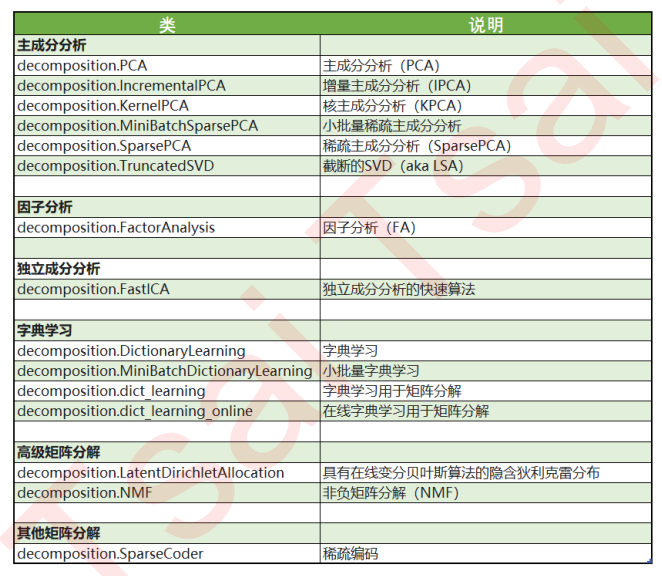

## 重要参数n_components

PCA的参数如下，我们说第一个n_components。  
n_components是我们降维后需要的维度，即降维后需要保留的特征数量，降维流程中第二步里需要确认的k值，
一般输入[0, min(X.shape)]范围中的整数。一说到K，大家可能都会想到，类似于KNN中的K和随机森林中的
n_estimators，这是一个需要我们人为去确认的超参数，并且我们设定的数字会影响到模型的表现。如果留下的特
征太多，就达不到降维的效果，如果留下的特征太少，那新特征向量可能无法容纳原始数据集中的大部分信息，因
此，n_components既不能太大也不能太小。那怎么办呢？  
可以先从我们的降维目标说起：如果我们希望可视化一组数据来观察数据分布，我们往往将数据降到三维以下，很多时候是二维，即n_components的取值为2。


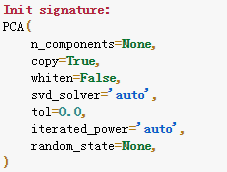

### 调用库和模块

In [2]:
import matplotlib.pyplot as plt            #导入画图的模块
from sklearn.datasets import load_iris     # 导入鸢尾花数据集
from sklearn.decomposition import PCA      # 导入PCA

### 提取数据集

In [4]:
iris = load_iris()

In [6]:
 #数据集是以字典的形式的储存，键‘data’s对于特征，键‘target’对于标签
iris   

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### 提取特征和标签

In [7]:
X = iris.data
y = iris.target

In [8]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
X.shape    # X是二维数组，有四列特征，所以说特征维度就是4

(150, 4)

In [10]:
# 我们把X转变成DataFrame看看，确实是4列特征
import pandas as pd 
pd.DataFrame(X)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 现在利用PCA把4列特征，降成2列，以进行可视化

In [13]:
#调用PCA
pca = PCA(n_components=2)          #实例化，n_components=2表示降到2维
pca = pca.fit(X)                   #拟合模型
X_dr = pca.transform(X)            #获取新矩阵

In [14]:
X_dr                               # 结果变成了两列
#也可以fit_transform一步到位
#X_dr = PCA(2).fit_transform(X)

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

### 数据可视化

要将三种鸢尾花的数据分布显示在二维平面坐标系中，对应的两个坐标（两个特征向量）应该是三种鸢尾花降维后的
x1和x2，怎样才能取出三种鸢尾花下不同的x1和x2呢？请看下面的代码：


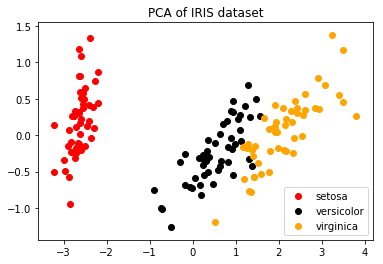

In [16]:
plt.figure()
plt.scatter(X_dr[y==0, 0], X_dr[y==0, 1], c="red", label=iris.target_names[0])
plt.scatter(X_dr[y==1, 0], X_dr[y==1, 1], c="black", label=iris.target_names[1])
plt.scatter(X_dr[y==2, 0], X_dr[y==2, 1], c="orange", label=iris.target_names[2])
plt.legend()
plt.title('PCA of IRIS dataset')
plt.show()

当然也可以写个循环：

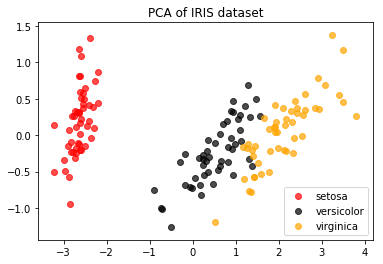

In [19]:
colors = ['red', 'black', 'orange'] 
iris.target_names

plt.figure()
for i in [0, 1, 2]:
    plt.scatter(X_dr[y == i, 0]
                ,X_dr[y == i, 1]
                ,alpha=0.7
                ,c=colors[i]
                ,label=iris.target_names[i]
                )
plt.legend()
plt.title('PCA of IRIS dataset')
plt.show()

鸢尾花的分布被展现在我们眼前了，明显这是一个分簇的分布，并且每个簇之间的分布相对比较明显，也许
versicolor和virginia这两种花之间会有一些分类错误，但setosa肯定不会被分错。这样的数据很容易分类，可以遇见，KNN，随机森林，神经网络，朴素贝叶斯，Adaboost这些分类器在鸢
尾花数据集上，未调整的时候都可以有
95%上下的准确率。


###  探索降维后的数据

#### 查看降维后每一个新特征的所带信息量的大小

In [20]:
#属性explained_variance_，查看降维后每个新特征向量上所带的信息量大小（可解释性方差的大小）
pca.explained_variance_

array([4.22824171, 0.24267075])

可见第一个主成分基本占据了所有的信息量

#### 查看降维后每个新特征向量所占的信息量占原始数据总信息量的百分比

In [24]:
#属性explained_variance_ratio，查看降维后每个新特征向量所占的信息量占原始数据总信息量的百分比
#又叫做可解释方差贡献率
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [25]:
# 降维后信息保留多少
pca.explained_variance_ratio_.sum()

0.977685206318795

### 选择最好的n_components：累积可解释方差贡献率曲线

当参数n_components中不填写任何值，则默认返回min(X.shape)个特征，一般来说，样本量都会大于特征数目，所以什么都不填就相当于转换了新特征空间，但没有减少特征的个数。一般来说，不会使
用这种输入方式。但我们却可以使用这种输入方式来画出累计可解释方差贡献率曲线，以此选择最好的n_components的整数取值。
累积可解释方差贡献率曲线是一条以降维后保留的特征个数为横坐标，降维后新特征矩阵捕捉到的可解释方差贡献率为纵坐标的曲线，能够帮助我们决定n_components最好的取值。


举个列子先：

In [29]:
pca_1 = PCA().fit(X)

In [31]:
pca_1.explained_variance_ratio_    # 默认还是原来的特征数，没有降维

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

我们可以利用numpy中的cumsum进行累计求和

In [32]:
import numpy as np

In [33]:
np.cumsum(pca_1.explained_variance_ratio_ )

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

ok ,我们可以用这种方式来画图

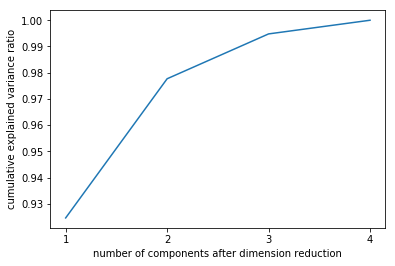

In [34]:
import numpy as np 
pca_line = PCA().fit(X)
plt.plot([1,2,3,4],np.cumsum(pca_line.explained_variance_ratio_)) 
plt.xticks([1,2,3,4])  
#这是为了限制坐标轴显示为整数
plt.xlabel("number of components after dimension reduction") 
plt.ylabel("cumulative explained variance ratio")
plt.show()

从图中可以看出 降维到2或者3差别不大

### 最大似然估计自选超参数


除了输入整数，n_components还有哪些选择呢？之前我们提到过，矩阵分解的理论发展在业界独树一帜，勤奋智慧的数学大神Minka, 
T.P.在麻省理工学院媒体实验室做研究时找出了让PCA用最大似然估计(maximum likelihood
estimation)自选超参数的方法，输入“mle”作为n_components的参数输入，就可以调用这种方法。


In [35]:
pca_mle = PCA(n_components="mle") 
pca_mle = pca_mle.fit(X)
X_mle = pca_mle.transform(X)

In [37]:
X_mle   # 说明这种最大似然估计认为降到3维最好

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

In [38]:
pca_mle.explained_variance_ratio_.sum()

#得到了比设定2个特征时更高的信息含量，对于鸢尾花这个很小的数据集来说
#3个特征对应这么高的信息含量，并不需要去纠结于只保留2个特征，毕竟三个特征也可以可视化


0.9947878161267247

### 按信息量占比选超参数

输入[0,1]之间的浮点数，并且让参数svd_solver 
=='full'，表示希望降维后的总解释性方差占比大于n_components指定的百分比，即是说，希望保留百分之多少的信息量。比如说，如果我们希望保留97%的信息量，就可以输入 
n_components = 0.97，PCA会自动选出能够让保留的信息量超过97%的特征数量。


In [39]:
pca_f = PCA(n_components=0.97,svd_solver="full") 
pca_f = pca_f.fit(X)
X_f = pca_f.transform(X)

In [40]:
X_f   # 降成了二维

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [41]:
pca_f.explained_variance_ratio_    

array([0.92461872, 0.05306648])

In [45]:
pca_f.explained_variance_ratio_.sum()

0.977685206318795